In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt
from IPython.display import HTML, Latex, Math

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Mostra/Nascondi celle</a>.''')

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
# Valentina Guarino, mat. 978477

## <span style="color:red">  ESERCITAZIONE 5</span>

Scopo dell'esercitazione è valutare tramite tecniche MonteCarlo il valore medio del raggio delle orbite dell'atomo di idrogeno $H$ sia nel caso di stato fondamentale $1s$ sia nel caso di stato eccitato $2p$, e confrontarlo poi con i valori trovati analiticamente dalle soluzioni dell'equazione d'onda:

$$\left\langle r \right\rangle = \frac{a_{0}}{2}[3n^2 - l(l+1)]$$

Dove, per il ground state e per il primo stato eccitato, il valor medio del raggio vale

$$\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0, \quad n=1, l=0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0, \quad n=2, l=1$$

essendo $a_{0}= \frac{4\pi\epsilon_0\hbar^2}{m_e e^2}=0.0529$ nm il raggio di Bohr.
Poiché lo stato di una singola particella può essere descritto dalla sua funzione d'onda $\Psi(\vec{r},t)$, dove $\vec{r}$ identifica la posizione della particella al tempo $t$, allora identificando la funzione d'onda come un'ampiezza di probabilità si può interpretare $|\Psi(\vec{r},t)|^2$ come una densità di probabilità. Essa può essere campionata utilizzando un **algoritmo di Metropolis**: data una distribuzione di probabilità $p(\vec{x})$, viene generato un random walk per le variabili multidimensionali $\vec{x}$ che, asintoticamente, porta la distribuzione delle $\vec{x}$ a convergere alla $p(\vec{x})$ da campionare. Le mosse del random walk seguono una transition probability $T(\vec{x}|\vec{y})$, dove $\vec{x}$ sono le nuove mosse proposte e $\vec{y}$ i punti in cui il sistema si trova attualmente; valutando l'accettazione $$A(\vec{x}|\vec{y}) = min[1, q(\vec{x}|\vec{y})], \quad q(\vec{x}|\vec{y}) = \frac{T(\vec{y}|\vec{x})p(\vec{x})}{T(\vec{x}|\vec{y})p(\vec{y})}$$

si ha la probabilità che la nuova mossa generata venga accettata, in quanto porta il sistema ad andare in una zona con probabilità maggiore.

### Calcolo del valor medio del raggio

Campionando le 3 coordinate cartesiane $x,y,z$ dalle distribuzioni di probabilità
$$|\Psi(x,y,z)_{1,0,0}|^2 = \frac{a_{0}^{-3}}{\pi} e^{\frac{-2\sqrt{x^2+y^2+z^2}}{a_{0}}}$$

$$|\Psi(x,y,z)_{2,1,0}|^2 = \frac{a_{0}^{-5}}{32\pi} y^2 e^{\frac{-2\sqrt{x^2+y^2+z^2}}{a_{0}}}$$

utilizzando come transition probability sia $T(\vec{x}|\vec{y})$ uniforme sia $T(\vec{x}|\vec{y})$ gaussiana ed utilizzando dei passi $\delta$ tali che $A(\vec{x}|\vec{y}) \simeq 0.5$ si ottengono i seguenti risultati per i valor medi del raggio $r = \sqrt{x^2 + y^2 + z^2}$, partendo da una posizione iniziale $y = a_{0} = 1$: 

#### Stato 1s

Avendo impostato $a_{0} = 1$, si ha come valore analitico $\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}$. 

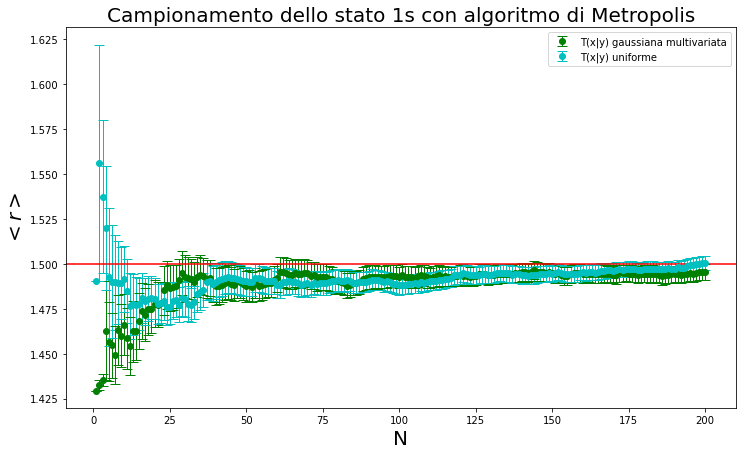

In [4]:
plt.figure(figsize=(12,7))
#Andamento del valor medio del raggio nello stato 1s
M, mean1s, std = np.loadtxt("Risultati/meanr1s_gauss.dat", usecols = (0,1,2), unpack = True)
plt.errorbar(M, mean1s, yerr=std, label = "T(x|y) gaussiana multivariata", fmt = "go", capsize = 5, elinewidth = 1)
M, mean1s, std = np.loadtxt("Risultati/meanr1s_unif.dat", usecols = (0,1,2), unpack = True)
plt.errorbar(M, mean1s, yerr=std, label = "T(x|y) uniforme", fmt = "co", capsize = 5, elinewidth = 1)
plt.axhline(y=3/2,color="red")
plt.title("Campionamento dello stato 1s con algoritmo di Metropolis", fontsize = 20)
plt.ylabel("$<r>$", fontsize = 20)
plt.xlabel("N", fontsize = 20)
plt.legend(loc="best")
plt.show()

I risultati ottenuti per il valor medio del raggio convergono velocemente al valore analitico entro un'incertezza di $1\sigma$; inoltre, sia con una $T(\vec{x}|\vec{y})$ uniforme che gaussiana, si ottengono risultati statisticamente equivalenti.

Si può inoltre osservare la distribuzione dei punti campionati nello spazio tridimensionale:

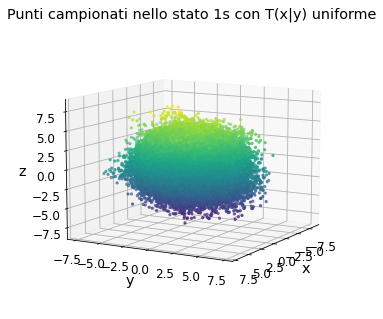

In [5]:
#Distribuzione dei punti campionati nello stato 1s con T(x|y) uniforme
fig = plt.figure()
X=np.loadtxt("Risultati/config1s_unif.dat", usecols = 0, unpack = True)
Y=np.loadtxt("Risultati/config1s_unif.dat", usecols = 1, unpack = True)
Z=np.loadtxt("Risultati/config1s_unif.dat", usecols = 2, unpack = True)
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Punti campionati nello stato 1s con T(x|y) uniforme")
ax.view_init(10, 30)
plt.show()

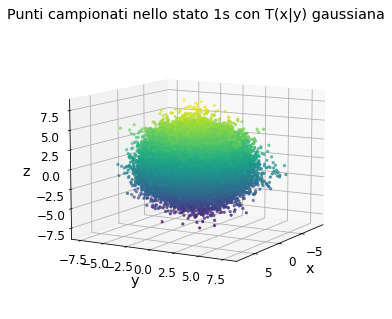

In [12]:
#Distribuzione dei punti campionati nello stato 1s con T(x|y) gaussiana
fig = plt.figure()
X=np.loadtxt("Risultati/config1s_gauss.dat", usecols = 0, unpack = True)
Y=np.loadtxt("Risultati/config1s_gauss.dat", usecols = 1, unpack = True)
Z=np.loadtxt("Risultati/config1s_gauss.dat", usecols = 2, unpack = True)
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Punti campionati nello stato 1s con T(x|y) gaussiana")
ax.view_init(10, 30)
plt.show()

La distribuzione dei punti segue una forma sferica, coerente con un orbitale di tipo $s$.

#### Stato 2p

Per lo stato $2p$, il valor medio del raggio con $a_0 = 1$ equivale a $\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5$. 

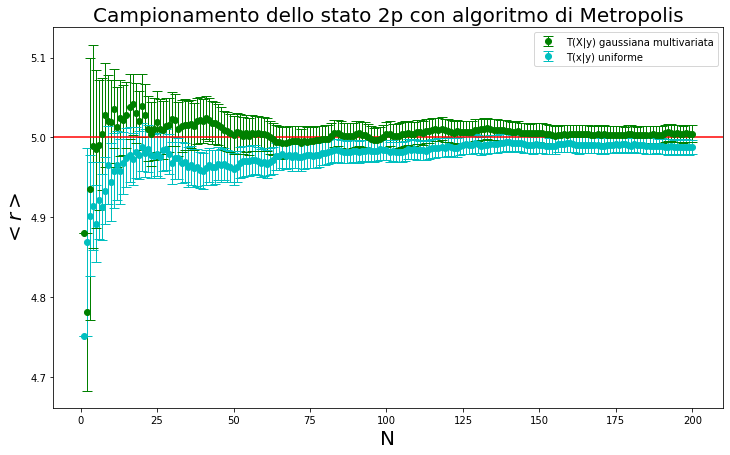

In [5]:
#Andamento del valor medio del raggio nello stato 2p
plt.figure(figsize=(12,7))
M, mean1s, std = np.loadtxt("Risultati/meanr2p_gauss.dat", usecols = (0,1,2), unpack = True)
plt.errorbar(M, mean1s, yerr=std, label = "T(X|y) gaussiana multivariata", fmt = "go", capsize = 5, elinewidth = 1)
M, mean1s, std = np.loadtxt("Risultati/meanr2p_unif.dat", usecols = (0,1,2), unpack = True)
plt.errorbar(M, mean1s, yerr=std, label = 'T(x|y) uniforme', fmt = "co", capsize = 5, elinewidth = 1)
plt.legend(loc = 'best')
plt.axhline(y=5,color="red")
plt.title("Campionamento dello stato 2p con algoritmo di Metropolis", fontsize = 20)
plt.ylabel("$<r>$", fontsize = 20)
plt.xlabel("N", fontsize = 20)
plt.show()

Anche per esso si ha una convergenza dei risultati ottenuti entro $1\sigma$, e non si notano differenze statisticamente rilevanti nell'utilizzo di una $T(\vec{x}|\vec{y})$ uniforme piuttosto che gaussiana.

Si mostra la distribuzione dei punti campionati nello stato $2p$:

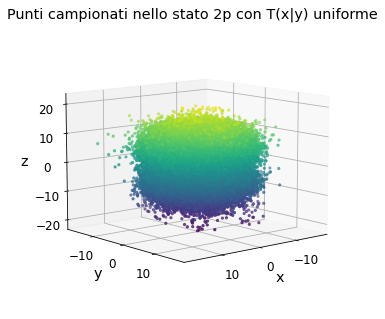

In [27]:
#Distribuzione dei punti campionati nello stato 2p con T(x|y) uniforme
fig = plt.figure()
X=np.loadtxt("Risultati/config2p_unif.dat", usecols = 0, unpack = True)
Y=np.loadtxt("Risultati/config2p_unif.dat", usecols = 1, unpack = True)
Z=np.loadtxt("Risultati/config2p_unif.dat", usecols = 2, unpack = True)
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Punti campionati nello stato 2p con T(x|y) uniforme")
ax.view_init(10, 50)
plt.show()

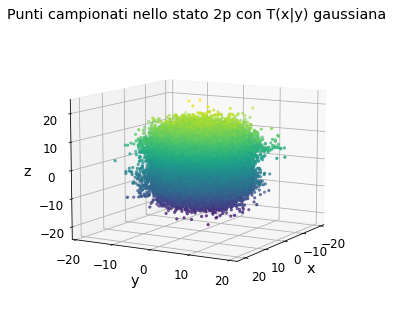

In [22]:
#Distribuzione dei punti campionati nello stato 2p con T(x|y) gaussiana
fig = plt.figure()
X=np.loadtxt("Risultati/config2p_gauss.dat", usecols = 0, unpack = True)
Y=np.loadtxt("Risultati/config2p_gauss.dat", usecols = 1, unpack = True)
Z=np.loadtxt("Risultati/config2p_gauss.dat", usecols = 2, unpack = True)
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Punti campionati nello stato 2p con T(x|y) gaussiana")
ax.view_init(10, 30)
plt.show()

Si può notare come, in corrispondenza dell'origine degli assi, vi sia una zona di restringimento, in cui non vi sono punti campionati. La forma ottenuta difatti ricorda la forma di un orbitale di tipo $p$.

### Efficienza dell'algoritmo: partenza da regioni lontane

Si è provato a valutare l'andamento dei risultati partendo da regioni molto lontane dall'origine, ad esempio scegliendo come punto iniziale $\vec{y} = 500$. In questo caso ci si aspetta un'elevata accettazione delle mosse, in quanto le mosse tenderanno a portarci in regioni con probabilità $p(\vec{x})$ maggiore della probabilità relativa alla zona in cui troviamo, $p(\vec{y})$. D'altronde però, partendo da regioni lontane, la distribuzione degli $n$ punti campionati tramite random walk $d_{n}(\vec{x})$ convergerà più lentamente alla distribuzione di probabilità campionata $p(\vec{x})$: in questo caso si avrà dunque un **tempo di equilibrazione** maggiore, ovvero i punti campionati impiegheranno più tempo per raggiungere le zone con alta $p(\vec{x})$.

#### Stato 1s

Nello stato $1s$ si può notare come dopo $10^6$ steps MonteCarlo l'algoritmo di Metropolis non sia riuscito a campionare correttamente lo spazio, restando in zone lontane da quelle con alta $p(\vec{x})$:

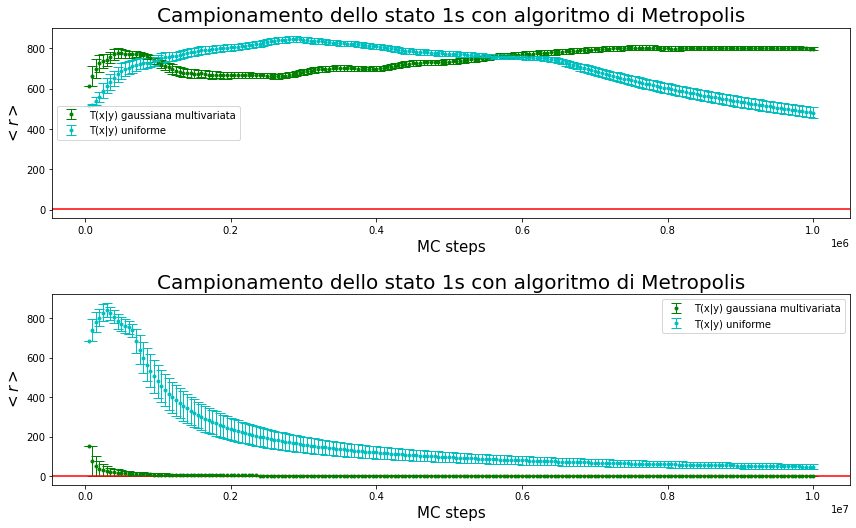

In [3]:
plt.figure(figsize=(12,7))
#Andamento del valor medio del raggio nello stato 1s partendo da un punto iniziale con coordinate \vec{y} = 500,
#utilizzando 10^6 e 10^7 MC steps
L = 5000
plt.subplot(2,1,1)
N, mean1s, std = np.loadtxt("Risultati/meanr1s_gauss_far106.dat", usecols = (0,1,2), unpack = True)
plt.errorbar(N*L, mean1s, yerr=std, label = "T(x|y) gaussiana multivariata", fmt = "g.", capsize = 5, elinewidth = 1)
N, mean1s, std = np.loadtxt("Risultati/meanr1s_unif_far106.dat", usecols = (0,1,2), unpack = True)
plt.errorbar(N*L, mean1s, yerr=std, label = "T(x|y) uniforme", fmt = "c.", capsize = 5, elinewidth = 1)
plt.axhline(y=3/2,color="red")
plt.title("Campionamento dello stato 1s con algoritmo di Metropolis", fontsize = 20)
plt.ylabel("$<r>$", fontsize = 15)
plt.xlabel("MC steps", fontsize = 15)
plt.legend(loc="best")

L = 50000
plt.subplot(2,1,2)
N, mean1s, std = np.loadtxt("Risultati/meanr1s_gauss_far107.dat", usecols = (0,1,2), unpack = True)
plt.errorbar(N*L, mean1s, yerr=std, label = "T(x|y) gaussiana multivariata", fmt = "g.", capsize = 5, elinewidth = 1)
N, mean1s, std = np.loadtxt("Risultati/meanr1s_unif_far107.dat", usecols = (0,1,2), unpack = True)
plt.errorbar(N*L, mean1s, yerr=std, label = "T(x|y) uniforme", fmt = "c.", capsize = 5, elinewidth = 1)
plt.axhline(y=3/2,color="red")
plt.title("Campionamento dello stato 1s con algoritmo di Metropolis", fontsize = 20)
plt.ylabel("$<r>$", fontsize = 15)
plt.xlabel("MC steps", fontsize = 15)
plt.legend(loc="best")

plt.tight_layout()
plt.subplots_adjust(top=1.,hspace=0.4)
plt.show()

Aumentando invece gli steps MonteCarlo di un fattore $10$, si può notare come l'algoritmo di Metropolis, utilizzando una $T(\vec{x}|\vec{y})$ gaussiana multivariata, raggiunga il tempo di equilibrazione necessario per campionare punti con $p(\vec{x})$ elevata, e converga comunque al risultato analitico. Ciò invece non accade per un campionamento con $T(\vec{x}|\vec{y})$ uniforme per il quale $10^7$ steps MonteCarlo non sono un tempo sufficiente per raggiungere l'equilibrazione del sistema scegliendo come punto iniziale uno molto lontano dalla zona di alta probabilità del sistema. 

Ciò ci porta a supporre che, in un caso in cui non si conosca la zona di alta probabilità del sistema analizzato e si abbia dunque il rischio di partire da zone di bassa probabilità, campionare con l'algoritmo di Metropolis utilizzando una transition probability $T(\vec{x}|\vec{y})$ **_gaussiana_** sia da preferire in quanto garantisce una convergenza più veloce rispetto ad una transition probability $T(\vec{x}|\vec{y})$ uniforme.

#### Stato 2p

Nello stato $2p$ la convergenza è invece garantita con entrambe le transition probabilities, anche per steps MonteCarlo di $10^6$.

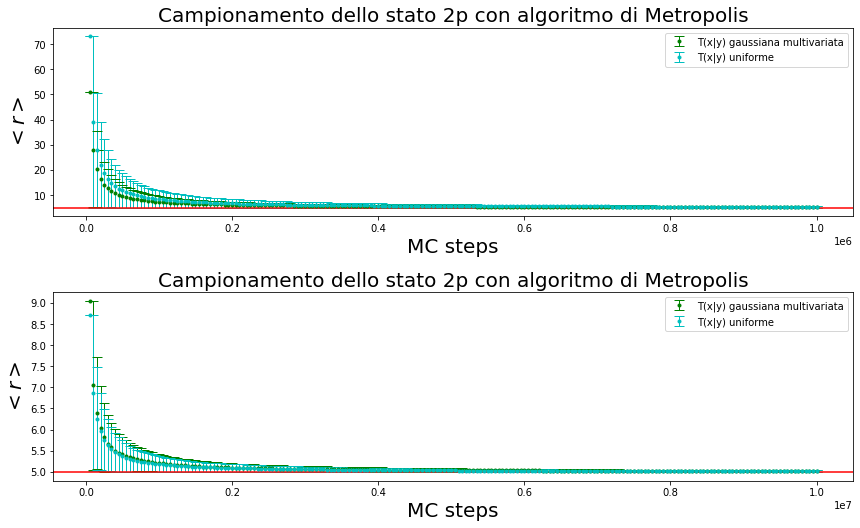

In [9]:
plt.figure(figsize=(12,7))
#Andamento del valor medio del raggio nello stato 2p partendo da un punto iniziale con coordinate \vec{y} = 500,
#utilizzando 10^6 e 10^7 MC steps
L = 5000
plt.subplot(2,1,1)
N, mean2p, std = np.loadtxt("Risultati/meanr2p_gauss_far106.dat", usecols = (0,1,2), unpack = True)
plt.errorbar(N*L, mean2p, yerr=std, label = "T(x|y) gaussiana multivariata", fmt = "g.", capsize = 5, elinewidth = 1)
N, mean2p, std = np.loadtxt("Risultati/meanr2p_unif_far106.dat", usecols = (0,1,2), unpack = True)
plt.errorbar(N*L, mean2p, yerr=std, label = "T(x|y) uniforme", fmt = "c.", capsize = 5, elinewidth = 1)
plt.axhline(y=5,color="red")
plt.title("Campionamento dello stato 2p con algoritmo di Metropolis", fontsize = 20)
plt.ylabel("$<r>$", fontsize = 20)
plt.xlabel("MC steps", fontsize = 20)
plt.legend(loc="best")

L = 50000
plt.subplot(2,1,2)
N, mean2p, std = np.loadtxt("Risultati/meanr2p_gauss_far107.dat", usecols = (0,1,2), unpack = True)
plt.errorbar(N*L, mean2p, yerr=std, label = "T(x|y) gaussiana multivariata", fmt = "g.", capsize = 5, elinewidth = 1)
N, mean2p, std = np.loadtxt("Risultati/meanr2p_unif_far107.dat", usecols = (0,1,2), unpack = True)
plt.errorbar(N*L, mean2p, yerr=std, label = "T(x|y) uniforme", fmt = "c.", capsize = 5, elinewidth = 1)
plt.axhline(y=5,color="red")
plt.title("Campionamento dello stato 2p con algoritmo di Metropolis", fontsize = 20)
plt.ylabel("$<r>$", fontsize = 20)
plt.xlabel("MC steps", fontsize = 20)
plt.legend(loc="best")

plt.tight_layout()
plt.subplots_adjust(top=1.,hspace=0.4)
plt.show()

### Metodo a blocchi: calcolo dell'autocorrelazione

L'algoritmo di Metropolis genera della configurazioni che hanno un certo grado di correlazione tra loro per un certo numero di steps MonteCarlo. Per misure correlate non vale il Teorema del Limite Centrale, il quale rappresenta una distribuzione limite per processi di random walk; è perciò essenziale che le configurazioni campionate siano scorrelate tra di loro. 

Viene perciò utilizzato il metodo a blocchi per le misurazioni statistiche: gli steps MonteCarlo vengono divisi in un certo numero di blocchi $N$, ognuno di larghezza $L$ adeguata, di modo che tra blocchi successivi le misure siano scorrelate. Da ogni blocco si valuterà la _media di blocco_, che verrà poi utilizzata per il calcolo delle _medie cumulative_.

Per assicurare che le misure tra i vari blocchi siano tra loro scorrelate si devono scegliere taglie dei blocchi sufficientemente grandi; si può utilizzare la funzione di autocorrelazione per valutare la taglia del blocco $L_{Ac}$ oltre la quale le misure siano scorrelate, e scegliere poi una $L >> L_{Ac}$ per assicurare un'analisi statistica corretta.

#### Stato 1s

In [11]:
#Calcolo della funzione di autocorrelazione per i valori del raggio nello stato 1s utilizzando una T(x|y) uniforme
x, y, z = np.loadtxt("Risultati/config1s_unif.dat", usecols = (0,1,2), unpack = True)
r = np.sqrt(x**2+y**2+z**2)
lag = np.arange(0,5000,1)
tM = len(r)
acf_1s_unif = []


for t in lag:
    sum_1 = 0
    sum_2 = 0
    sum_3 = 0
    sum_4 = 0
    sum_5 = 0
    for t_sim in range(0,tM - t):
        sum_1 += r[t_sim]* r[t_sim + t]
        sum_2 += r[t_sim]
        sum_3 += r[t_sim + t]
    for t_sim in range(0,tM):
        sum_4 += r[t_sim]**2
        sum_5 += r[t_sim]        
    ac = ((1 / (tM - t)) * sum_1 - (1 / (tM - t)) * sum_2 * (1 / (tM - t)) * sum_3) / ((1 / tM) * sum_4 - ((1 / tM) * sum_5)**2)
    acf_1s_unif.append(ac)

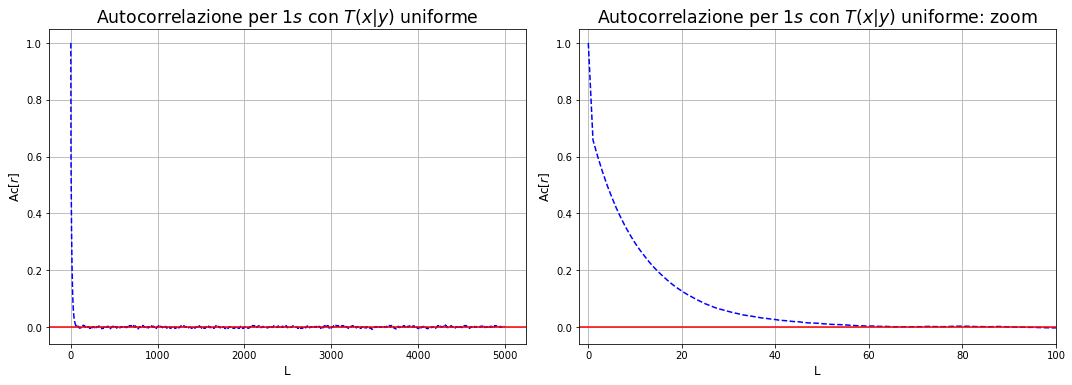

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(acf_1s_unif, '--b')
plt.title("Autocorrelazione per $1s$ con $T(x|y)$ uniforme", fontsize = "xx-large")
plt.xlabel("L",fontsize = "large")
plt.ylabel("Ac[$r$]",fontsize = "large")
plt.axhline(y = 0, color = 'red')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(acf_1s_unif, '--b')
plt.xlim(-2,100)
plt.title("Autocorrelazione per $1s$ con $T(x|y)$ uniforme: zoom", fontsize = "xx-large")
plt.xlabel("L",fontsize = "large")
plt.ylabel("Ac[$r$]",fontsize = "large")
plt.axhline(y = 0, color = 'red')
plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=1.,hspace=0.4)
plt.show()

In [13]:
#Calcolo della funzione di autocorrelazione per i valori del raggio nello stato 1s utilizzando una T(x|y) gaussiana
x, y, z = np.loadtxt("Risultati/config1s_gauss.dat", usecols = (0,1,2), unpack = True)
r = np.sqrt(x**2+y**2+z**2)
lag = np.arange(0,5000,1)
tM = len(r)
acf_1s_gauss = []


for t in lag:
    sum_1 = 0
    sum_2 = 0
    sum_3 = 0
    sum_4 = 0
    sum_5 = 0
    for t_sim in range(0,tM - t):
        sum_1 += r[t_sim]* r[t_sim + t]
        sum_2 += r[t_sim]
        sum_3 += r[t_sim + t]
    for t_sim in range(0,tM):
        sum_4 += r[t_sim]**2
        sum_5 += r[t_sim]        
    ac_g = ((1 / (tM - t)) * sum_1 - (1 / (tM - t)) * sum_2 * (1 / (tM - t)) * sum_3) / ((1 / tM) * sum_4 - ((1 / tM) * sum_5)**2)
    acf_1s_gauss.append(ac_g)

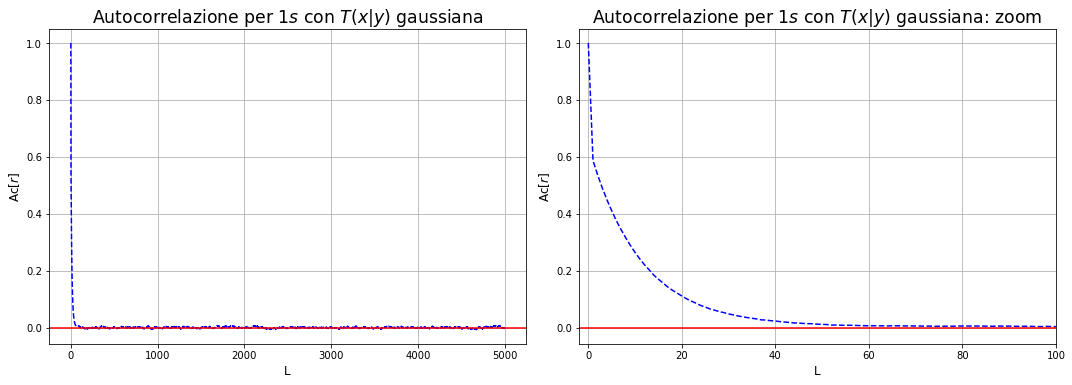

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(acf_1s_gauss, '--b')
plt.title("Autocorrelazione per $1s$ con $T(x|y)$ gaussiana", fontsize = "xx-large")
plt.xlabel("L",fontsize = "large")
plt.ylabel("Ac[$r$]",fontsize = "large")
plt.axhline(y = 0, color = 'red')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(acf_1s_gauss, '--b')
plt.xlim(-2,100)
plt.title("Autocorrelazione per $1s$ con $T(x|y)$ gaussiana: zoom", fontsize = "xx-large")
plt.xlabel("L",fontsize = "large")
plt.ylabel("Ac[$r$]",fontsize = "large")
plt.axhline(y = 0, color = 'red')
plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=1.,hspace=0.4)
plt.show()

Dopo $L_{Ac} = 60$ MC steps l'autocorrelazione relativa ai valori istantanei del raggio, calcolato utilizzando le coordinate $(x,y,z)$ dei punti campionati come $r = \sqrt{x^2 + y^2 + z^2}$, si azzera, pur mantenendo leggere oscillazioni attorno al valor nullo.
Poiché si utilizzano $10^6$ MC steps e blocchi $N = 200$, la taglia di ogni blocco equivale a $L = 5000 >> L_{Ac}$, il che ci assicura la non correlazione tra le misure.

In [3]:
#Calcolo della funzione di autocorrelazione per i valori dei raggi nello stato 2p utilizzando una T(x|y) uniforme
x, y, z = np.loadtxt("Risultati/config2p_unif.dat", usecols = (0,1,2), unpack = True)
r = np.sqrt(x**2+y**2+z**2)
lag = np.arange(0,5000,1)
tM = len(r)
acf_2p_unif = []


for t in lag:
    sum_1 = 0
    sum_2 = 0
    sum_3 = 0
    sum_4 = 0
    sum_5 = 0
    for t_sim in range(0,tM - t):
        sum_1 += r[t_sim]* r[t_sim + t]
        sum_2 += r[t_sim]
        sum_3 += r[t_sim + t]
    for t_sim in range(0,tM):
        sum_4 += r[t_sim]**2
        sum_5 += r[t_sim]        
    ac_2p = ((1 / (tM - t)) * sum_1 - (1 / (tM - t)) * sum_2 * (1 / (tM - t)) * sum_3) / ((1 / tM) * sum_4 - ((1 / tM) * sum_5)**2)
    acf_2p_unif.append(ac_2p)

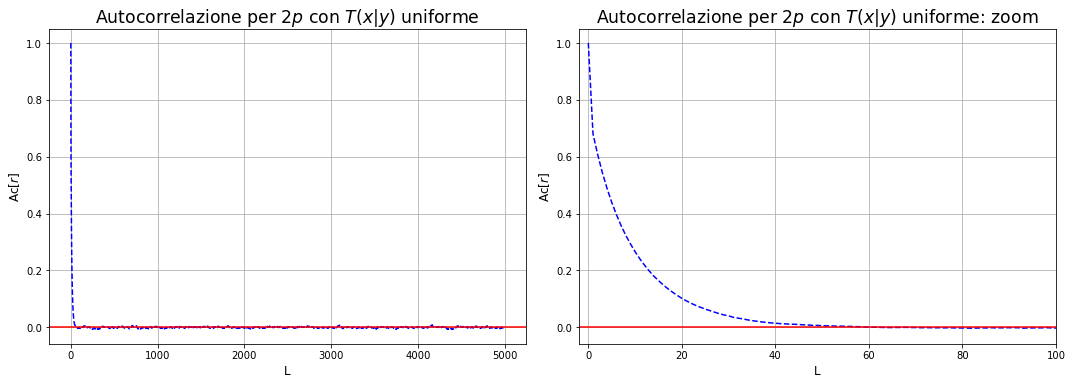

In [9]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(acf_2p_unif, '--b')
plt.title("Autocorrelazione per $2p$ con $T(x|y)$ uniforme", fontsize = "xx-large")
plt.xlabel("L",fontsize = "large")
plt.ylabel("Ac[$r$]",fontsize = "large")
plt.axhline(y = 0, color = 'red')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(acf_2p_unif, '--b')
plt.xlim(-2,100)
plt.title("Autocorrelazione per $2p$ con $T(x|y)$ uniforme: zoom", fontsize = "xx-large")
plt.xlabel("L",fontsize = "large")
plt.ylabel("Ac[$r$]",fontsize = "large")
plt.axhline(y = 0, color = 'red')
plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=1.,hspace=0.4)
plt.show()

In [5]:
#Calcolo della funzione di autocorrelazione per i valori medi utilizzando una T(x|y) gaussiana
gauss = np.loadtxt("Risultati/config2p_gauss.dat", usecols = (0,1,2), unpack = True)
r = np.sqrt(x**2+y**2+z**2)
lag = np.arange(0,5000,1)
tM = len(r)
acf_2p_gauss = []


for t in lag:
    sum_1 = 0
    sum_2 = 0
    sum_3 = 0
    sum_4 = 0
    sum_5 = 0
    for t_sim in range(0,tM - t):
        sum_1 += r[t_sim]* r[t_sim + t]
        sum_2 += r[t_sim]
        sum_3 += r[t_sim + t]
    for t_sim in range(0,tM):
        sum_4 += r[t_sim]**2
        sum_5 += r[t_sim]        
    ac_2p_g = ((1 / (tM - t)) * sum_1 - (1 / (tM - t)) * sum_2 * (1 / (tM - t)) * sum_3) / ((1 / tM) * sum_4 - ((1 / tM) * sum_5)**2)
    acf_2p_gauss.append(ac_2p_g)

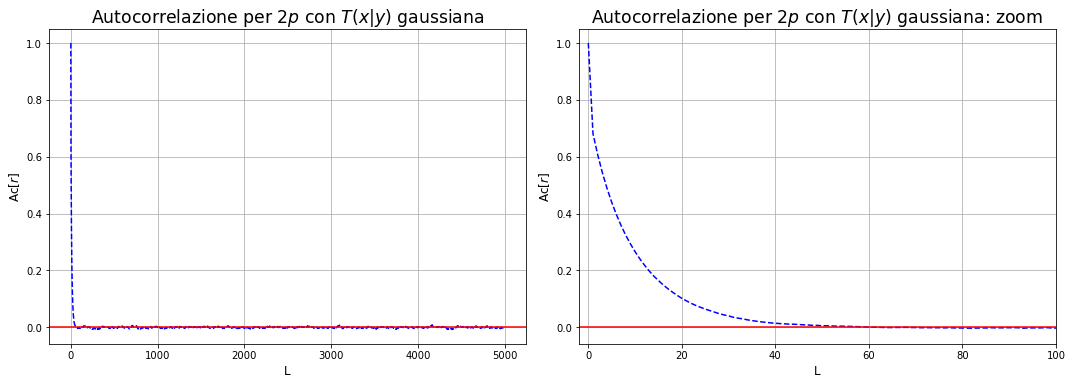

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(acf_2p_gauss, '--b')
plt.title("Autocorrelazione per $2p$ con $T(x|y)$ gaussiana", fontsize = "xx-large")
plt.xlabel("L",fontsize = "large")
plt.ylabel("Ac[$r$]",fontsize = "large")
plt.axhline(y = 0, color = 'red')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(acf_2p_gauss, '--b')
plt.xlim(-2,100)
plt.title("Autocorrelazione per $2p$ con $T(x|y)$ gaussiana: zoom", fontsize = "xx-large")
plt.xlabel("L",fontsize = "large")
plt.ylabel("Ac[$r$]",fontsize = "large")
plt.axhline(y = 0, color = 'red')
plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=1.,hspace=0.4)
plt.show()

Per lo stato $2p$ si evince che la funzione di autocorrelazione del raggio si annulla dopo $L_{Ac} \simeq 50$ MC steps per entrambe le $T(\vec{x}|\vec{y})$ scelte nell'algoritmo di Metropolis. Anche in questo caso, la scelta di $L = 5000 >> L_{Ac}$ ci garantisce una corretta analisi statistica.